

# Project: Investigate a Dataset (Medical_Appointment_No_Shows Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

>Data has 14 column. 
<li><a > patientId </a></li> Identification of a patient.
<li><a > AppointmentID </a></li> Identification of each appointment.
<li><a > Gender</a></li> Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
<li><a > ScheduledDay </a></li> The day someone called or registered the appointment, this is before appointment of course.
<li><a > AppointmentDay </a></li> The day of the actuall appointment, when they have to visit the doctor.
<li><a > Age </a></li> How old is the patient.
<li><a > Neighbourhood </a></li> Where the appointment takes place.
<li><a > Scholarship </a></li> True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia .
<li><a > Hipertension </a></li> True or False.
<li><a > Diabetes </a></li> True or False.
<li><a > Alcoholism </a></li> True or False.
<li><a > Handcap </a></li> True or False.
<li><a > SMS_received </a></li> 1 or more messages sent to the patient.
<li><a > No-show </a></li> True or False.

### We will investigate the data and answer some questions like :
<ul>
<li><a href="#q1">Do gender relate to attending oppointment ? </a></li>
<li><a href="#q2"> Are people with illness more likely to show ? </a></li>
<li><a href="#q3"> Do age afect the attendance ? </a></li>
<li><a href="#q4"> Are people who got sms more likely to show ? </a></li>
<li><a href="#q5"> Are patients whom enrolled in Brasilian welfare program more likely to show ? </a></li>
<li><a href="#q6"> What is the most common num of days that patient need to wait to attend the appointment ? </a></li>
</ul>
let's begin 

## Import libraries needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, We will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Medical_Appointment_No_Shows.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning (Replace this with more specific notes!)

check if there is duplicates

In [4]:
df.duplicated().sum()

0

check for null or missing values in columns

In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The data in 'No-show' column No states that the patient went to the appointment and Yes if he/she didn't go, 
So i will replace 'No-show' column with another called 'show' were
Yes means went to the appointment and No that didn't go

In [6]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [7]:
df['show']  = df['No-show']
df.loc[df['No-show'] == 'Yes' ,'show'] = 'No'
df.loc[df['No-show'] == 'No'  ,'show'] = 'Yes'

Drop No-show column

In [8]:
df.drop('No-show', axis = 1 ,inplace= True )

Make columns ScheduledDay & AppointmentDay in date format

In [9]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']) 

In [10]:
df['ScheduledDay'] = [time.date() for time in df['ScheduledDay']]
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [11]:
df['AppointmentDay'] = [time.date() for time in df['AppointmentDay']]
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

Adding new column that indicates number of dayes the patient had to wait between he/she registered the appointment and the appointment day.

In [12]:
df['day_waited'] = df['AppointmentDay'] - df['ScheduledDay']

In [13]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,day_waited
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,0 days
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,0 days
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,0 days
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,0 days
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,0 days


Drop patietId and AppointmentID Columns As they wont give much information

In [14]:
df.drop(['PatientId' ,'AppointmentID' ] , axis = 1 , inplace = True)

convert all column names to lower case

In [15]:
df.rename(columns= lambda x:x.lower()  , inplace= True)

The final looking cleaned data

In [16]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show,day_waited
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,0 days
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,0 days
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,0 days
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,0 days
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,0 days


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   gender          110527 non-null  object         
 1   scheduledday    110527 non-null  datetime64[ns] 
 2   appointmentday  110527 non-null  datetime64[ns] 
 3   age             110527 non-null  int64          
 4   neighbourhood   110527 non-null  object         
 5   scholarship     110527 non-null  int64          
 6   hipertension    110527 non-null  int64          
 7   diabetes        110527 non-null  int64          
 8   alcoholism      110527 non-null  int64          
 9   handcap         110527 non-null  int64          
 10  sms_received    110527 non-null  int64          
 11  show            110527 non-null  object         
 12  day_waited      110527 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(7), object(3), timedelta64[ns](1)
memory usage

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that we've trimmed and cleaned the data, we're ready to move on to exploration.
<a id='q1'></a>
### Q1 : Do gender relate to attending oppointment ?

In [18]:
df.gender.value_counts()

F    71840
M    38687
Name: gender, dtype: int64

In [19]:
gen_f = df[df['gender'] =='F']
gen_m = df[df['gender'] =='M']

In [20]:
num_f = gen_f.shape[0]
num_f_y = gen_f[gen_f['show'] == 'Yes'].shape[0]
num_f_n = gen_f[gen_f['show'] == 'No'].shape[0]
print('num of female come to appontment', num_f_y)
print('num of female didt come to appontment', num_f_n)

num of female come to appontment 57246
num of female didt come to appontment 14594


In [21]:
per_num_f_y = num_f_y / num_f
per_num_f_n = num_f_n / num_f

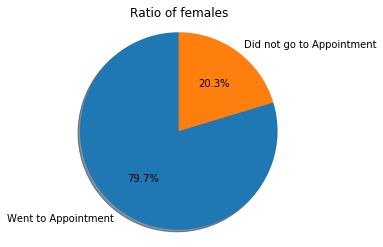

In [22]:
fig1, ax1 = plt.subplots()
ax1.pie([per_num_f_y , per_num_f_n], labels=['Went to Appointment' , 'Did not go to Appointment'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Ratio of females')
plt.show()

In [23]:
num_m = gen_m.shape[0]
num_m_y = gen_m[gen_m['show'] == 'Yes'].shape[0]
num_m_n = gen_m[gen_m['show'] == 'No'].shape[0]
print('num of male come to appontment', num_m_y)
print('num of male didt come to appontment', num_m_n)

num of male come to appontment 30962
num of male didt come to appontment 7725


In [24]:
per_num_m_y = num_m_y / num_m
per_num_m_n = num_m_n / num_m

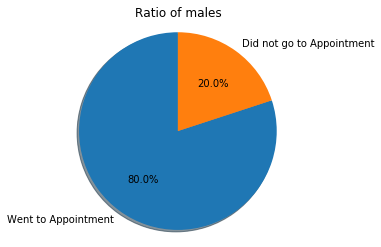

In [25]:
fig1, ax1 = plt.subplots()
ax1.pie([per_num_m_y , per_num_m_n], labels=['Went to Appointment' , 'Did not go to Appointment'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Ratio of males')
plt.show()

In [26]:
print('percentage of males attended = ' , per_num_m_y)
print('percentage of females attended = ' , per_num_f_y)

percentage of males attended =  0.8003205211052808
percentage of females attended =  0.7968541202672605


**Note:** We can see that the percentage of males and females whom attended the appointment is almost the same

<a id='q2'></a>
### Q2 : Are people with illness more likely to show ?

**Small function to help us in analysis**

In [27]:
def percents(col):
    #function that combare between the percentage of columns with[0,1] values
    # 0 : without
    # 1 : with
    #values that the patients with 1 value attendence percent
    # and the people without 0 that attended percent
    
    # percentage of people with illness who attend
    test = df[df[col] ==1]
    tot1= test.shape[0]
    per_test_y = test[test['show'] == 'Yes'].shape[0] / tot1
    
    # percentage of people with out that illness who attend
    test2 = df[df[col] == 0]
    tot2 = test2.shape[0]
    per_test2_y = test2[test2['show'] == 'Yes'].shape[0] / tot2
    
    print('percentage of people with {} that attend the appointment is {}'.format(col , per_test_y))
    print('percentage of people without {} that attend the appointment is {}'.format(col , per_test2_y))
    print()
    
    plt.bar(['With' , 'Without'] ,[per_test_y , per_test2_y] )
    plt.title('Percentage of people with {} to attendence and people with out'.format(col))
    plt.show
    
    

In [28]:
# array of illnesses names
st = ['hipertension','diabetes','alcoholism','handcap']

percentage of people with hipertension that attend the appointment is 0.8269804137424889
percentage of people without hipertension that attend the appointment is 0.7909631900457589



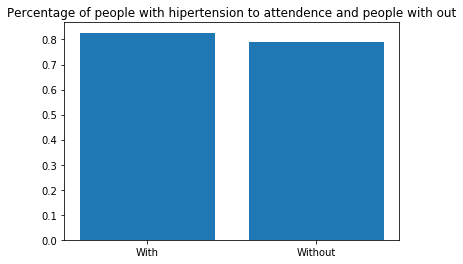

In [29]:
percents(st[0])  # hipertension

**People with hiperyension are sligtly more like to attend the appointment**

percentage of people with diabetes that attend the appointment is 0.8199672667757774
percentage of people without diabetes that attend the appointment is 0.7963717538797473



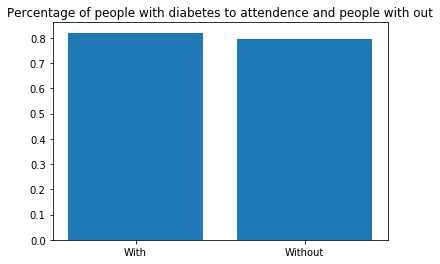

In [30]:
percents(st[1]) # diabetes

**People having diabetes are little likely to attend the oppointment**

percentage of people with alcoholism that attend the appointment is 0.7985119047619048
percentage of people without alcoholism that attend the appointment is 0.798053505276811



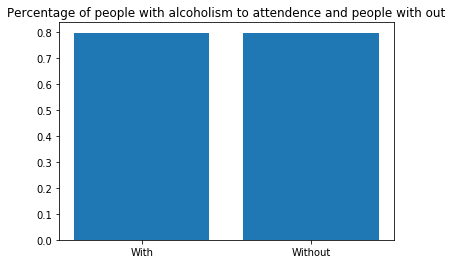

In [31]:
percents(st[2]) # alcoholism

**Interseting** *alchol seems to have no impact on attending the appointment as people whom are drinking alchol and peoplr whome didnt seem to have the same parobabilty of attending the appointment.* 

percentage of people with handcap that attend the appointment is 0.8207639569049952
percentage of people without handcap that attend the appointment is 0.7976469719077258



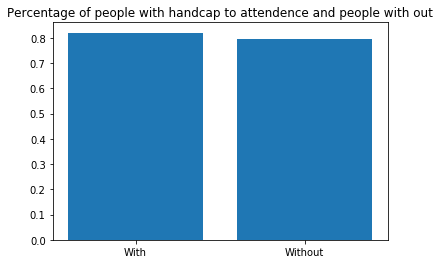

In [32]:
percents(st[3]) # handcap

*People having handcap are a little more likely to attend the appointment.*

<a id='q3'></a>
### Q3 : Do age afect the attendance ?

***we will first split age column into five catigories***
Age between
<li><a > 0-17 ---> 0 </a></li>
<li><a > 18-21 ---> 1 </a></li>
<li><a > 22-28 ---> 2 </a></li>
<li><a > 29-38 ---> 3 </a></li>
<li><a > 56-115 ---> 4 </a></li>

In [33]:
df.loc[df.age.isin(range(-1,18)) ,'age'] = 0 
df.loc[df.age.isin(range(18,22)) ,'age'] = 1 
df.loc[df.age.isin(range(22,29)) ,'age'] = 2 
df.loc[df.age.isin(range(29,39)) ,'age'] = 3 
df.loc[df.age.isin(range(39,56)) ,'age'] = 4 
df.loc[df.age.isin(range(56,116)),'age'] = 5 

In [34]:
df['age'].value_counts()

5    27504
0    27380
4    25277
3    15038
2     9407
1     5921
Name: age, dtype: int64

In [35]:
def get_percent_y(col , value):
    #function that calculates the percent of people in certain age catigory whom attended the opponent
    
    catg = df[df[col] == value]
    tot = catg.shape[0]
    per = catg[catg['show'] == 'Yes'].shape[0] / tot
    return per

calculate the percent of each category of attendance

In [36]:
percent_age=np.zeros(6)
for i in range(0,6):
    percent_age[i] = get_percent_y('age' , i)

In [37]:
ages = ['0-17', '18-21', '22-28', '29-38', '39-55','56-76']

In [38]:
for i ,j in zip(percent_age , ages):
    print('the percent of people in age {} to attend is {}'.format(j,i))

the percent of people in age 0-17 to attend is 0.7809715120525932
the percent of people in age 18-21 to attend is 0.754433372741091
the percent of people in age 22-28 to attend is 0.7512490698416073
the percent of people in age 29-38 to attend is 0.7812209070355101
the percent of people in age 39-55 to attend is 0.8047632234837995
the percent of people in age 56-76 to attend is 0.8435500290866783


<function matplotlib.pyplot.show(*args, **kw)>

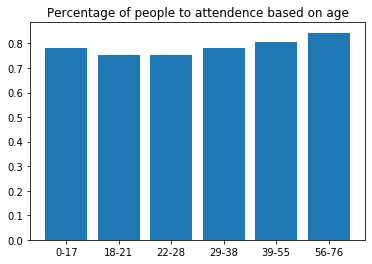

In [39]:
plt.bar( ages ,percent_age )
plt.title('Percentage of people to attendence based on age')
plt.show

*Older and younger patient have the highest probabilites to attend the appointment*

<a id='q4'></a>
### Q4 : Are people who got sms more likely to show ?

In [40]:
df.sms_received.unique()

array([0, 1], dtype=int64)

We can handel this column with [0,1]  values with percents function we made

percentage of people with sms_received that attend the appointment is 0.7242545516036301
percentage of people without sms_received that attend the appointment is 0.8329668865347458



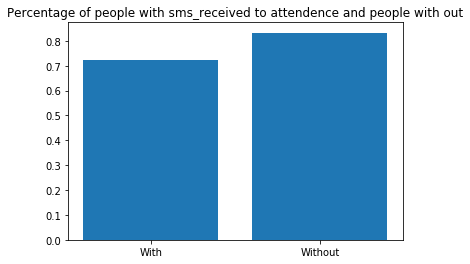

In [41]:
percents('sms_received')

*We can see that if you didnt get a message then you have a high chance to attend the appointment as expected as if the patient went to the appoint ment in time then no one would send him a message to attend the appointment*

<a id='q5'></a>
### Q5 : Are patients whom enrolled in Brasilian welfare program more likely to show ?

In [42]:
df.scholarship.value_counts()

0    99666
1    10861
Name: scholarship, dtype: int64

we can also treat that column as illness columns

percentage of people with scholarship that attend the appointment is 0.7626369579228433
percentage of people without scholarship that attend the appointment is 0.8019284409929164



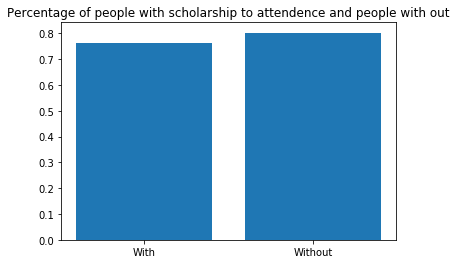

In [43]:
percents('scholarship')

***From the chart we realize that people whom are members at the Brasilian welfare program are less likely to attend the appointment.***

<a id='q6'></a>
### Q6 : What is the most common num of days that patient need to wait to attend the appointment ?

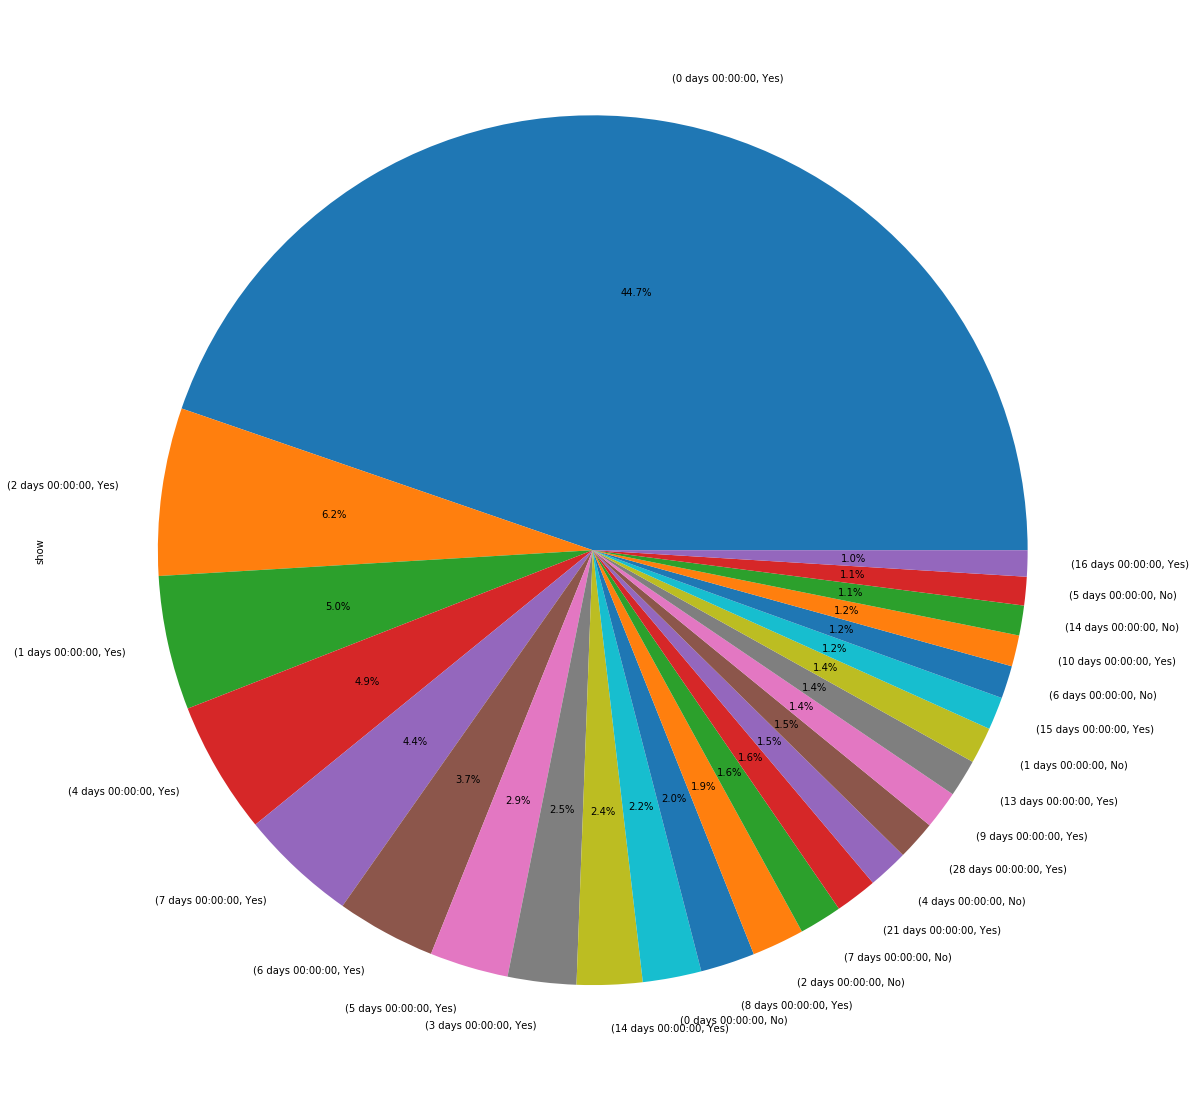

In [44]:
df.groupby('day_waited')['show'].value_counts().sort_values(ascending = False).head(25).plot(kind = 'pie' , figsize = (20,20) , autopct='%1.1f%%')

**According to the above chart 0 wait days is the highest spreed num that patient need to wait to go to the appointment   (0 means in the same day of the regestration) then 2 days then 1 day.**

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, we can summarize the findings and the results that have been performed.

> there wasn't any missing or dublicated data in the data set , i chaged the column of No-show with another one called show where yes in No=show become No in show

**1- Do gender relate to attending oppointment ?**

 the percentage of males attended  the appointment is 0.8 and the percentage of females attended is 0.796.

**2- Are people with illness more likely to show in the appointment ?**

*people with hipertension has 0.82 percent to attend and people with out has 0.79 percent to attend the appointment.*

*people with diabetes has 0.819 percent to attend and people with out has 0.796 percent to attend the appointment.*

*people with alcoholism has 0.7985 percent to attend and people with out has 0.798 percent to attend the appointment.*

*people with handcap has 0.0.82 percent to attend and people with out has 0.797 percent to attend the appointment.*

**3- Do age afect the attendance ?**

*the percent of people in age 0-17 to attend is 0.78.*

*the percent of people in age 18-21 to attend is 0.754.*

*the percent of people in age 22-28 to attend is 0.751.*

*the percent of people in age 29-38 to attend is 0.781.*

*the percent of people in age 39-55 to attend is 0.804.*

*the percent of people in age 56-76 to attend is 0.843.*

**4- Are people who got sms more likely to show ?**

*people whom got sms has 0.724 percent to attend and people whom didn't get has 0.8329 percent to attend the appointment*

**5- Are patients whom enrolled in Brasilian welfare program more likely to show ?**

*people whom are in Brasilian welfare program has 0.762 percent to attend and people whom are not has 0.8019 percent to attend the appointment.*

**6- What is the most common num of days that patient need to wait to attend the appointment ?**

*0 day to wait then 2 dayes then 1 day.*

***web sites that helped me***

https://www.kaggle.com/joniarroba/noshowappointments link to data 

https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.bar.html  

https://academic.oup.com/geronj/article-abstract/34/3/358/580392?redirectedFrom=PDF to make age categories

https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.pie.html

***Notes***

**After analysing the data i can state that :**

*the data need more information about the patients as the kind of illness that he has as if it can cause danger to his life in th long term then he will have higher chance to attend the appoint ment.*

*Num of data is good for making a small model to predict whether the pathent will attend the appointment or not.*

*The percent of each column to the show column is about 80% for almost all the columns that in general i can say that a patient has 80% chance to attend the appointment.*



In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_Medical_Appointment_Dataset.ipynb'])

0